In [11]:
import pandas as pd
import re
import matplotlib.pyplot as plt
AA  = ['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I','L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V']
Amino_acid_dict = {'Ala': 'A',
                   'Arg': 'R',
                   'Asn': 'N',
                   'Asp': 'D',
                   'Cys': 'C',
                   'Gln': 'Q',
                   'Glu': 'E',
                   'Gly': 'G',
                   'His': 'H',
                   'Ile': 'I',
                   'Leu': 'L',
                   'Lys': 'K',
                   'Met': 'M',
                   'Phe': 'F',
                   'Pro': 'P',
                   'Ser': 'S',
                   'Thr': 'T',
                   'Trp': 'W',
                   'Tyr': 'Y',
                   'Val': 'V',
                   'Ter': '*'
                  }

PREF_MERGED_DIR = './output/merged_preference/'

# HIV Env BF520 human host, rhesus host

In [2]:
def transform_host(index_file, pref_file, rep_num):
    df_index = pd.read_csv(index_file, delimiter = ',')
    df = pd.read_csv(pref_file)
    df = df.dropna()
    df['site'] = df['site'].astype('string')
    df_index['original'] = df_index['original'].astype('string')
    df_index['new'] = df_index['new'].astype('string')

    df['site'] = df['site'].map(df_index.set_index('new')['original'])
    df = df.dropna()
    df['site'] = df['site'].astype('int')
    
    site_list = []
    AA_list = []
    df_pref_only = df[AA]
    for i in df['site'].tolist():
        site_list += [i]*20
        AA_list += AA
    df_pref = pd.DataFrame(columns=['site', 'amino_acid', rep_num]) 
    df_pref['site'] = site_list
    df_pref['amino_acid'] = AA_list
    df_pref[rep_num] = df_pref_only.values.flatten()
    return df_pref

# BG505
index_file = './data/prefs/BG505_to_HXB2_numbering.txt'
Target_name = 'HIV BG505'

pref_file = './data/prefs/HIV Env BG505-1_prefs.csv'
rep_num = 'rep_1'
df1 = transform_host(index_file, pref_file, rep_num)

pref_file = './data/prefs/HIV Env BG505-2_prefs.csv'
rep_num = 'rep_2'
df2 = transform_host(index_file, pref_file, rep_num)

pref_file = './data/prefs/HIV Env BG505-3_prefs.csv'
rep_num = 'rep_3'
df3 = transform_host(index_file, pref_file, rep_num)

df_merge = pd.merge(df1, df2, on = ['site', 'amino_acid'])
df_merge = pd.merge(df_merge, df3, on = ['site', 'amino_acid'])
df_merge['average'] = df_merge[['rep_1', 'rep_2', 'rep_3']].mean(axis=1)
df_merge = df_merge.sort_values('site')
df_merge.to_csv(PREF_MERGED_DIR + Target_name + '.csv.gz', index = False, compression = 'gzip')


# BF520
index_file = './data/prefs/BF520c2_to_HXB2.csv'
Target_name = 'HIV BF520'

pref_file = './data/prefs/HIV Env BF520-1_prefs.csv'
rep_num = 'rep_1'
df1 = transform_host(index_file, pref_file, rep_num)

pref_file = './data/prefs/HIV Env BF520-2_prefs.csv'
rep_num = 'rep_2'
df2 = transform_host(index_file, pref_file, rep_num)

pref_file = './data/prefs/HIV Env BF520-3_prefs.csv'
rep_num = 'rep_3'
df3 = transform_host(index_file, pref_file, rep_num)

df_merge = pd.merge(df1, df2, on = ['site', 'amino_acid'])
df_merge = pd.merge(df_merge, df3, on = ['site', 'amino_acid'])
df_merge['average'] = df_merge[['rep_1', 'rep_2', 'rep_3']].mean(axis=1)
df_merge = df_merge.sort_values('site')
df_merge.to_csv(PREF_MERGED_DIR + Target_name + '.csv.gz', index = False, compression = 'gzip')

# BF520 human host
index_file = './data/prefs/BF520c2_to_HXB2.csv'
Target_name = 'HIV BF520 human host'

pref_file = './data/prefs/HIV BF520 human host-1_prefs.csv'
rep_num = 'rep_1'
df1 = transform_host(index_file, pref_file, rep_num)

pref_file = './data/prefs/HIV BF520 human host-2_prefs.csv'
rep_num = 'rep_2'
df2 = transform_host(index_file, pref_file, rep_num)

df_merge = pd.merge(df1, df2, on = ['site', 'amino_acid'])
df_merge['average'] = df_merge[['rep_1', 'rep_2']].mean(axis=1)
df_merge = df_merge.sort_values('site')
df_merge.to_csv(PREF_MERGED_DIR + Target_name + '.csv.gz', index = False, compression = 'gzip')

# BF520 rhesus host
index_file = './data/prefs/BF520c2_to_HXB2.csv'
Target_name = 'HIV BF520 rhesus host'

pref_file = './data/prefs/HIV BF520 rhesus host-1_prefs.csv'
rep_num = 'rep_1'
df1 = transform_host(index_file, pref_file, rep_num)

pref_file = './data/prefs/HIV BF520 rhesus host-2_prefs.csv'
rep_num = 'rep_2'
df2 = transform_host(index_file, pref_file, rep_num)

df_merge = pd.merge(df1, df2, on = ['site', 'amino_acid'])
df_merge['average'] = df_merge[['rep_1', 'rep_2']].mean(axis=1)
df_merge = df_merge.sort_values('site')
df_merge.to_csv(PREF_MERGED_DIR + Target_name + '.csv.gz', index = False, compression = 'gzip')


# PR8, Aichi68C

In [3]:
def preference_merge(REP, Target_name, count_file):
    pref_list = ['./data/prefs/'+Target_name+'-1_prefs.csv',
                 './data/prefs/'+Target_name+'-2_prefs.csv',
                 './data/prefs/'+Target_name+'-3_prefs.csv']

    df_count = pd.read_csv(count_file)
    site_list = df_count['site'].tolist()
    site_list_merged = []
    for site in site_list:
        site_list_merged += [site]*20

    aa_list_merged = []
    for i in range(len(site_list)):
        aa_list_merged += AA

    rep=[i+1 for i in range(REP)]
    rep_list=[]
    for replicate in rep:
        rep_list.append('rep_'+str(replicate))
    df_pref_merged = pd.DataFrame(columns=['site', 'amino_acid'] + rep_list + ['average'])
    df_pref_merged['site'] = site_list_merged
    df_pref_merged['amino_acid'] = aa_list_merged

    for i in rep:
        df_pref = pd.read_csv(pref_list[i-1])
        df_pref_aa = df_pref[AA]
        df_pref_merged['rep_'+str(i)] = df_pref_aa.values.flatten()
    df_pref_merged['average'] = df_pref_merged[rep_list].mean(axis = 1)
    df_pref_merged.to_csv(PREF_MERGED_DIR + Target_name + '.csv.gz', index = False, compression = 'gzip')

# PR8
REP=3
Target_name = 'PR8'
count_file = './data/raw_data/PR8_DNA_codoncounts.csv'
preference_merge(REP, Target_name, count_file)

# Aichi68C
REP=2
Target_name = 'Aichi68C'
count_file = './data/raw_data/Aichi68C_DNA_codoncounts.csv'
preference_merge(REP, Target_name, count_file)


# Flu WSN, A549, CCL141, Matrix_M1, ZIKV, Perth2009

In [4]:
def transform_WSN(df, rep_num, WSN):
    if WSN == True:
        df = df.drop(['WT_AA', 'SITE_ENTROPY'], axis = 1)
        df.set_axis(['site']+[i[3] for i in df.columns[1:]], axis=1,inplace=True)
    site_list = []
    AA_list = []
    df_pref_only = df[AA]
    for i in df['site'].tolist():
        site_list += [i]*20
        AA_list += AA
    df_pref = pd.DataFrame(columns=['site', 'amino_acid', rep_num]) 
    df_pref['site'] = site_list
    df_pref['amino_acid'] = AA_list
    df_pref[rep_num] = df_pref_only.values.flatten()
    return df_pref

# WSN
Target_name = 'WSN'
df = pd.read_csv('./data/prefs/WSN-1_prefs.txt', delimiter = '\t')
rep_num = 'rep_1'
df1 = transform_WSN(df, rep_num, True)

df = pd.read_csv('./data/prefs/WSN-2_prefs.txt', delimiter = '\t')
rep_num = 'rep_2'
df2 = transform_WSN(df, rep_num, True)

df = pd.read_csv('./data/prefs/WSN-3_prefs.txt', delimiter = '\t')
rep_num = 'rep_3'
df3 = transform_WSN(df, rep_num, True)

df_merge = pd.merge(df1, df2, on = ['site', 'amino_acid'])
df_merge = pd.merge(df_merge, df3, on = ['site', 'amino_acid'])
df_merge['average'] = df_merge[['rep_1', 'rep_2', 'rep_3']].mean(axis=1)
df_merge = df_merge.sort_values('site')
df_merge.to_csv(PREF_MERGED_DIR + Target_name + '.csv.gz', index = False, compression = 'gzip')

# A549
Target_name = 'A549'
df = pd.read_csv('./data/prefs/A549-1_prefs.csv', delimiter = ',')
rep_num = 'rep_1'
df1 = transform_WSN(df, rep_num, False)

df = pd.read_csv('./data/prefs/A549-2_prefs.csv', delimiter = ',')
rep_num = 'rep_2'
df2 = transform_WSN(df, rep_num, False)

df_merge = pd.merge(df1, df2, on = ['site', 'amino_acid'])
df_merge['average'] = df_merge[['rep_1', 'rep_2']].mean(axis=1)
df_merge = df_merge.sort_values('site')
df_merge.to_csv(PREF_MERGED_DIR + Target_name + '.csv.gz', index = False, compression = 'gzip')

#CCL141
Target_name = 'CCL141'
df = pd.read_csv('./data/prefs/CCL141-1_prefs.csv', delimiter = ',')
rep_num = 'rep_1'
df1 = transform_WSN(df, rep_num, False)

df = pd.read_csv('./data/prefs/CCL141-2_prefs.csv', delimiter = ',')
rep_num = 'rep_2'
df2 = transform_WSN(df, rep_num, False)

df = pd.read_csv('./data/prefs/CCL141-3_prefs.csv', delimiter = ',')
rep_num = 'rep_3'
df3 = transform_WSN(df, rep_num, False)

df_merge = pd.merge(df1, df2, on = ['site', 'amino_acid'])
df_merge = pd.merge(df_merge, df3, on = ['site', 'amino_acid'])
df_merge['average'] = df_merge[['rep_1', 'rep_2', 'rep_3']].mean(axis=1)
df_merge = df_merge.sort_values('site')
df_merge.to_csv(PREF_MERGED_DIR + Target_name + '.csv.gz', index = False, compression = 'gzip')

# Matrix_M1
Target_name = 'Matrix_M1'
df = pd.read_csv('./data/prefs/Matrix_M1-1_prefs.csv', delimiter = ',')
rep_num = 'rep_1'
df1 = transform_WSN(df, rep_num, False)

df = pd.read_csv('./data/prefs/Matrix_M1-2_prefs.csv', delimiter = ',')
rep_num = 'rep_2'
df2 = transform_WSN(df, rep_num, False)

df = pd.read_csv('./data/prefs/Matrix_M1-3_prefs.csv', delimiter = ',')
rep_num = 'rep_3'
df3 = transform_WSN(df, rep_num, False)

df_merge = pd.merge(df1, df2, on = ['site', 'amino_acid'])
df_merge = pd.merge(df_merge, df3, on = ['site', 'amino_acid'])
df_merge['average'] = df_merge[['rep_1', 'rep_2', 'rep_3']].mean(axis=1)
df_merge = df_merge.sort_values('site')
df_merge.to_csv(PREF_MERGED_DIR + Target_name + '.csv.gz', index = False, compression = 'gzip')

# ZIKV
Target_name = 'ZIKV'
df = pd.read_csv('./data/prefs/ZIKV-1_prefs.csv', delimiter = ',')
rep_num = 'rep_1'
df1 = transform_WSN(df, rep_num, False)

df = pd.read_csv('./data/prefs/ZIKV-2_prefs.csv', delimiter = ',')
rep_num = 'rep_2'
df2 = transform_WSN(df, rep_num, False)

df = pd.read_csv('./data/prefs/ZIKV-3_prefs.csv', delimiter = ',')
rep_num = 'rep_3'
df3 = transform_WSN(df, rep_num, False)

df_merge = pd.merge(df1, df2, on = ['site', 'amino_acid'])
df_merge = pd.merge(df_merge, df3, on = ['site', 'amino_acid'])
df_merge['average'] = df_merge[['rep_1', 'rep_2', 'rep_3']].mean(axis=1)
df_merge = df_merge.sort_values('site')
df_merge.to_csv(PREF_MERGED_DIR + Target_name + '.csv.gz', index = False, compression = 'gzip')


# Perth2009
Target_name = 'Perth2009'
df = pd.read_csv('./data/prefs/Perth2009-1_prefs.csv', delimiter = ',')
rep_num = 'rep_1'
df1 = transform_WSN(df, rep_num, False)

df = pd.read_csv('./data/prefs/Perth2009-2_prefs.csv', delimiter = ',')
rep_num = 'rep_2'
df2 = transform_WSN(df, rep_num, False)

df = pd.read_csv('./data/prefs/Perth2009-3_prefs.csv', delimiter = ',')
rep_num = 'rep_3'
df3 = transform_WSN(df, rep_num, False)

df = pd.read_csv('./data/prefs/Perth2009-4_prefs.csv', delimiter = ',')
rep_num = 'rep_4'
df4 = transform_WSN(df, rep_num, False)

df_merge = pd.merge(df1, df2, on = ['site', 'amino_acid'])
df_merge = pd.merge(df_merge, df3, on = ['site', 'amino_acid'])
df_merge = pd.merge(df_merge, df4, on = ['site', 'amino_acid'])
df_merge['average'] = df_merge[['rep_1', 'rep_2', 'rep_3', 'rep_4']].mean(axis=1)
df_merge = df_merge.sort_values('site')
df_merge.to_csv(PREF_MERGED_DIR + Target_name + '.csv.gz', index = False, compression = 'gzip')


# TpoR, TpoR_S505N, Ube4b, YAP1

In [5]:
def Transfor_MaveDB(Target_name, pref_column, pref_file):
    df = pd.read_csv(pref_file, compression = 'gzip')
    site_list = []
    amino_acid = []
    pref_list = []
    for _ in range(len(pref_column)):
        pref_list.append([])
    for i in range(df.shape[0]):

        parser = re.split('(\d+)', df['hgvs_pro'][i])
        if len(parser) == 3 and '?' not in parser:
            site_list.append(int(parser[1]))
            amino_acid.append(Amino_acid_dict[parser[-1]])
            for idx in range(len(pref_column)):
                pref_list[idx].append(df[pref_column[idx]][i])

    df_merge = pd.DataFrame(columns=['site', 'amino_acid']+['rep_'+str(i+1) for i in range(len(pref_column))]+['average'])
    df_merge['site'] = site_list
    df_merge['amino_acid']= amino_acid
    for i in range(len(pref_column)):
        df_merge['rep_'+str(i+1)] = pref_list[i]
    df_merge['average'] = df_merge[['rep_'+str(i+1) for i in range(len(pref_column))]].mean(axis=1)
    df_merge = df_merge.sort_values('site')
    df_merge.to_csv(PREF_MERGED_DIR + Target_name + '.csv.gz', index = False, compression = 'gzip')
    

Target_name = 'TpoR'
pref_file = './data/prefs/TpoR_prefs.csv.gz'
pref_column = ['score_Replicate_A', 
               'score_Replicate_B', 
               'score_Replicate_C', 
               'score_Replicate_D', 
               'score_Replicate_E', 
               'score_Replicate_F.1']
Transfor_MaveDB(Target_name, pref_column, pref_file)


Target_name = 'TpoR_S505N'
pref_file = './data/prefs/TpoR_S505N_prefs.csv.gz'
pref_column = ['score_Replicate_1', 
               'score_Replicate_2', 
               'score_Replicate_3', 
               'score_Replicate_4', 
               'score_Replicate_5', 
               'score_Replicate_6.1']
Transfor_MaveDB(Target_name, pref_column, pref_file)


Target_name = 'Ube4b'
pref_file = './data/prefs/Ube4b_prefs.csv.gz'
pref_column = ['score_Rep_2', 
               'score_Rep_3']
Transfor_MaveDB(Target_name, pref_column, pref_file)


Target_name = 'YAP1'
pref_file = './data/prefs/YAP1_prefs.csv.gz'
pref_column = ['score_101208', 
               'score_110307']
Transfor_MaveDB(Target_name, pref_column, pref_file)

# BRCA1

In [6]:
def Transform_MaveDB1(Target_name, pref_column, pref_file):
    df = pd.read_csv(pref_file, compression = 'gzip')
    site_list = []
    amino_acid = []
    pref_list = []
    for _ in range(len(pref_column)):
        pref_list.append([])
    for i in range(df.shape[0]):
        parser = re.split('(\d+)', df['Variant_ID'][i])
        if len(parser) == 3:
            site_list.append(int(parser[1]))
            amino_acid.append(parser[-1])
            for idx in range(len(pref_column)):
                pref_list[idx].append(df[pref_column[idx]][i])

    df_merge = pd.DataFrame(columns=['site', 'amino_acid']+['rep_'+str(i+1) for i in range(len(pref_column))]+['average'])
    df_merge['site'] = site_list
    df_merge['amino_acid']= amino_acid
    for i in range(len(pref_column)):
        df_merge['rep_'+str(i+1)] = pref_list[i]
    df_merge['average'] = df_merge[['rep_'+str(i+1) for i in range(len(pref_column))]].mean(axis=1)
    df_merge = df_merge.sort_values('site')
    df_merge.to_csv(PREF_MERGED_DIR + Target_name + '.csv.gz', index = False, compression = 'gzip')



Target_name = 'E3'
pref_file = './data/prefs/E3_prefs.csv.gz'
pref_column = ['E3_log_slope1',
                'E3_log_slope2',
                'E3_log_slope3',
                'E3_log_slope4',
                'E3_log_slope5',
                'E3_log_slope6']
Transform_MaveDB1(Target_name, pref_column, pref_file)

Target_name = 'Y2H_1'
pref_file = './data/prefs/Y2H_1_prefs.csv.gz'
pref_column = ['Y2H_log_slope1',
               'Y2H_log_slope1',
               'Y2H_log_slope1']
Transform_MaveDB1(Target_name, pref_column, pref_file)

Target_name = 'Y2H_2'
pref_file = './data/prefs/Y2H_2_prefs.csv.gz'
pref_column = ['Y2H_log_slope4',
               'Y2H_log_slope5',
               'Y2H_log_slope6']
Transform_MaveDB1(Target_name, pref_column, pref_file)

# DBR1

In [7]:
df = pd.read_csv('./data/prefs/DBR1_prefs.csv.gz')
df = df.dropna()
df = df.drop(['Sequence', 'Reference AA', 'Variant Class'], axis = 1)
df = df.rename(columns={'Affected codon': 'site', 
                        'Substituted AA': 'amino_acid',
                        'Day 11 log2 enrichment score (replicate 1)': 'rep_1', 
                        'Day 11 log2 enrichment score (replicate 2)': 'rep_2'})
df['average'] = df[['rep_1', 'rep_2']].mean(axis = 1)
df['site'] = df['site'].astype('int')
df_merge = df.sort_values('site')
df_merge.to_csv(PREF_MERGED_DIR+'DBR1.csv.gz', index = False, compression = 'gzip')


# HIV Env BG505 FP16, FP20, VRC34

Not raw preference, but the differential selection

In [8]:
def transform_FP_VRC(index_file, pref_file, rep_num):
    df_index = pd.read_csv(index_file, delimiter = ',')
    df = pd.read_csv(pref_file)
    df = df.drop('wildtype', axis = 1)
    df = df.dropna()
    df['site'] = df['site'].astype('string')
    df_index['original'] = df_index['original'].astype('string')
    df_index['new'] = df_index['new'].astype('string')

    df['site'] = df['site'].map(df_index.set_index('new')['original'])
    df['site'] = df['site'].astype('int')
    df = df.rename(columns={'mutation': 'amino_acid', 'mutdiffsel': rep_num})
    return df

# FP16
index_file = './data/prefs/BG505_to_HXB2_numbering.txt'
Target_name = 'HIV bnAbs FP16'

pref_file = './data/prefs/FP16-02-500ug-rep-1.csv'
rep_num = 'rep_1'
df1 = transform_FP_VRC(index_file, pref_file, rep_num)

pref_file = './data/prefs/FP16-02-500ug-rep-3.csv'
rep_num = 'rep_2'
df2 = transform_FP_VRC(index_file, pref_file, rep_num)

df_merge = pd.merge(df1, df2, on = ['site', 'amino_acid'])
df_merge['average'] = df_merge[['rep_1', 'rep_2']].mean(axis=1)
df_merge = df_merge.sort_values('site')
df_merge.to_csv(PREF_MERGED_DIR + Target_name + '.csv.gz', index = False, compression = 'gzip')

#FP20
index_file = './data/prefs/BG505_to_HXB2_numbering.txt'
Target_name = 'HIV bnAbs FP20'

pref_file = './data/prefs/FP20-01-500ug-rep-1.csv'
rep_num = 'rep_1'
df1 = transform_FP_VRC(index_file, pref_file, rep_num)

pref_file = './data/prefs/FP20-01-500ug-rep-3.csv'
rep_num = 'rep_2'
df2 = transform_FP_VRC(index_file, pref_file, rep_num)

df_merge = pd.merge(df1, df2, on = ['site', 'amino_acid'])
df_merge['average'] = df_merge[['rep_1', 'rep_2']].mean(axis=1)
df_merge = df_merge.sort_values('site')
df_merge.to_csv(PREF_MERGED_DIR + Target_name + '.csv.gz', index = False, compression = 'gzip')

#VRC34
index_file = './data/prefs/BG505_to_HXB2_numbering.txt'
Target_name = 'HIV bnAbs VRC34'

pref_file = './data/prefs/VRC34-33ug-rep-1.csv'
rep_num = 'rep_1'
df1 = transform_FP_VRC(index_file, pref_file, rep_num)

pref_file = './data/prefs/VRC34-33ug-rep-3.csv'
rep_num = 'rep_2'
df2 = transform_FP_VRC(index_file, pref_file, rep_num)

df_merge = pd.merge(df1, df2, on = ['site', 'amino_acid'])
df_merge['average'] = df_merge[['rep_1', 'rep_2']].mean(axis=1)
df_merge = df_merge.sort_values('site')
df_merge.to_csv(PREF_MERGED_DIR + Target_name + '.csv.gz', index = False, compression = 'gzip')



In [19]:
def transform_MxA(pref_file, rep_num):
    df_index = pd.read_csv(index_file, delimiter = ',')
    df = pd.read_csv(pref_file)
    df = df.drop('wt', axis = 1)
    df = df.dropna()
    df['site'] = df['site'].astype('string')
    df_index['original'] = df_index['original'].astype('string')
    df_index['new'] = df_index['new'].astype('string')

#     df['site'] = df['site'].map(df_index.set_index('new')['original'])
    df['site'] = df['site'].astype('int')
    df = df.rename(columns={'mut': 'amino_acid', 'diffsel': rep_num})
    return df

#MxA
Target_name = 'MxA'

pref_file = './data/prefs/replicate-1_mutvir_MxA_mutvir_MS_mutdiffsel.txt'
rep_num = 'rep_1'
df1 = transform_MxA(pref_file, rep_num)

pref_file = './data/prefs/replicate-2_mutvir_MxA_mutvir_MS_mutdiffsel.txt'
rep_num = 'rep_2'
df2 = transform_MxA(pref_file, rep_num)

df_merge = pd.merge(df1, df2, on = ['site', 'amino_acid'])
df_merge['average'] = df_merge[['rep_1', 'rep_2']].mean(axis=1)
df_merge = df_merge.sort_values('site')
df_merge.to_csv(PREF_MERGED_DIR + Target_name + '.csv.gz', index = False, compression = 'gzip')

#MxAneg
Target_name = 'MxAneg'

pref_file = './data/prefs/replicate-1_mutvir_MxAneg_mutvir_MS_mutdiffsel.txt'
rep_num = 'rep_1'
df1 = transform_MxA(pref_file, rep_num)

pref_file = './data/prefs/replicate-2_mutvir_MxAneg_mutvir_MS_mutdiffsel.txt'
rep_num = 'rep_2'
df2 = transform_MxA(pref_file, rep_num)

df_merge = pd.merge(df1, df2, on = ['site', 'amino_acid'])
df_merge['average'] = df_merge[['rep_1', 'rep_2']].mean(axis=1)
df_merge = df_merge.sort_values('site')
df_merge.to_csv(PREF_MERGED_DIR + Target_name + '.csv.gz', index = False, compression = 'gzip')


<AxesSubplot:xlabel='rep_1', ylabel='rep_2'>

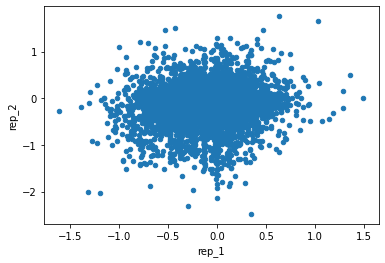

In [20]:
df_merge.plot.scatter('rep_1','rep_2')


In [21]:
pref_file = './data/prefs/replicate-1_mutvir_MxAneg_mutvir_MS_mutdiffsel.txt'
rep_num = 'rep_1'
df1 = transform_MxA(pref_file, rep_num)

df1

,site,amino_acid,rep_1
0,219,V,1.496169
1,420,M,1.354294
2,3,N,1.290251
3,497,W,1.284630
4,479,P,1.181027
...,...,...,...
9457,202,M,-1.296049
9458,233,L,-1.314724
9459,25,P,-1.316429
9460,74,H,-1.386807


In [22]:
pref_file = './data/prefs/replicate-2_mutvir_MxAneg_mutvir_MS_mutdiffsel.txt'
rep_num = 'rep_2'
df2 = transform_MxA(pref_file, rep_num)
df2

,site,amino_acid,rep_2
0,418,M,1.754593
1,484,P,1.649203
2,377,M,1.506162
3,368,M,1.461817
4,319,Q,1.459587
...,...,...,...
9457,25,P,-2.006026
9458,10,I,-2.035991
9459,347,W,-2.129798
9460,181,Q,-2.312053


In [23]:
df_merge = pd.merge(df1, df2, on = ['site', 'amino_acid'])
df_merge

,site,amino_acid,rep_1,rep_2
0,219,V,1.496169,-0.000091
1,420,M,1.354294,0.487250
2,3,N,1.290251,0.151303
3,497,W,1.284630,-0.212679
4,479,P,1.181027,-0.310286
...,...,...,...,...
9457,202,M,-1.296049,0.137120
9458,233,L,-1.314724,-0.101627
9459,25,P,-1.316429,-2.006026
9460,74,H,-1.386807,-0.190748
